# Вебинар 3. Визуализация и анализ данных.

**Подключение библиотек и скриптов**

In [23]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [25]:
PREPARED_DATASET_PATH = '../webinar_materials_2/housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [26]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [27]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
dtype: object

### Анализ целевой переменной

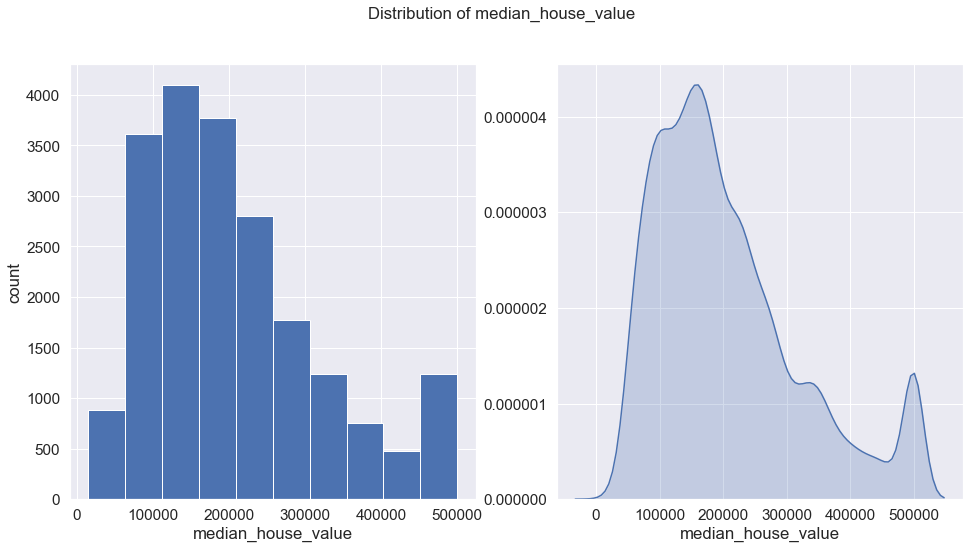

In [28]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist()
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [29]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(206855.82, 179700.0, 500001.0)

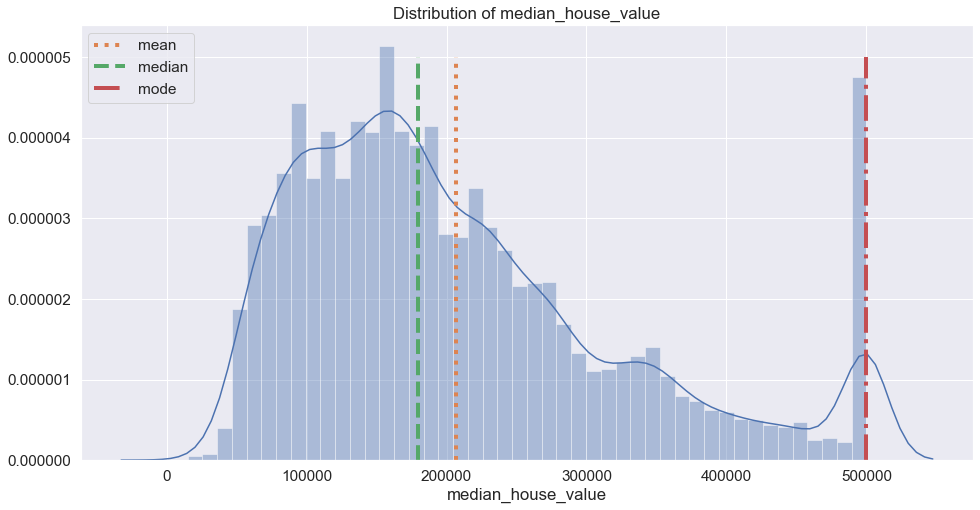

In [30]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [37]:
# 1 стратегия - разбиение с равным шагом
pd.cut(
    x=df['median_house_value'],
    bins=np.linspace(df['median_house_value'].min(), df['median_house_value'].max(), 100)
).value_counts().sort_index()

(14999.0, 19898.01]           1
(19898.01, 24797.02]          4
(24797.02, 29696.03]          5
(29696.03, 34595.04]         10
(34595.04, 39494.051]        14
                           ... 
(475505.949, 480404.96]      21
(480404.96, 485303.97]       30
(485303.97, 490202.98]       17
(490202.98, 495101.99]       20
(495101.99, 500001.0]      1011
Name: median_house_value, Length: 99, dtype: int64

In [42]:
# 2 стратегия - разбиение с равным количеством элементов
perc = [np.percentile(df['median_house_value'], q=x) for x in range(0, 101)]

pd.cut(
    x=df['median_house_value'], bins=perc, duplicates="drop").value_counts().sort_index()

(14999.0, 50000.0]       206
(50000.0, 55000.0]       215
(55000.0, 58800.0]       201
(58800.0, 62500.0]       205
(62500.0, 66200.0]       202
                        ... 
(393049.0, 410288.0]     206
(410288.0, 431654.0]     207
(431654.0, 452100.0]     207
(452100.0, 489810.0]     206
(489810.0, 500001.0]    1032
Name: median_house_value, Length: 96, dtype: int64

### Оценка распредения целевой переменной в разрезе других признаков

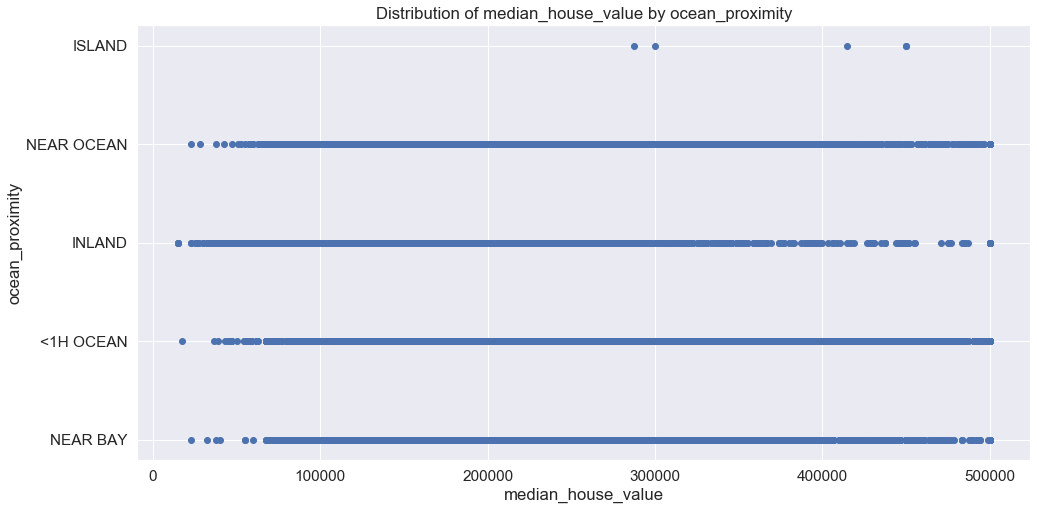

In [46]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Box plot**

<img src="boxplot.png" alt="Drawing" style="width: 600px;">

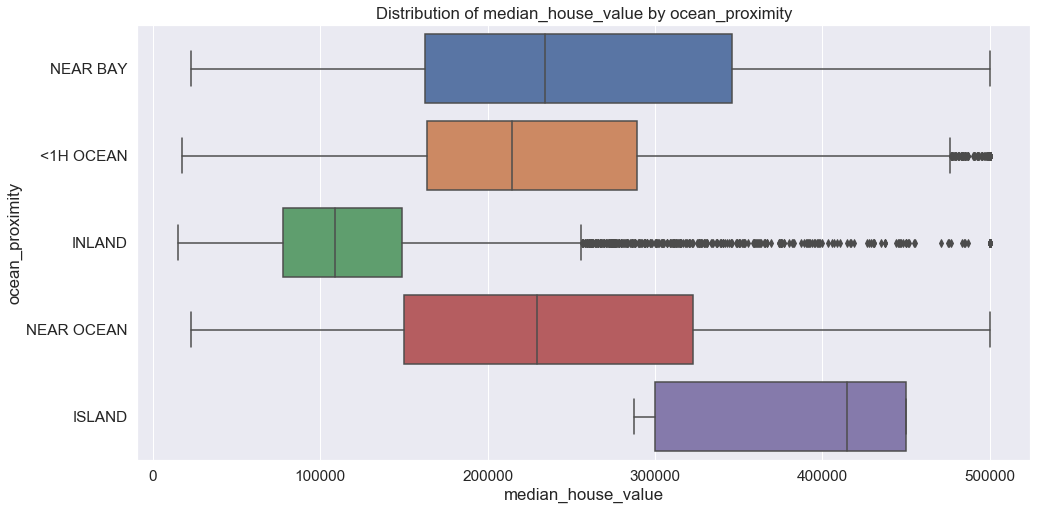

In [52]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Violin plot**

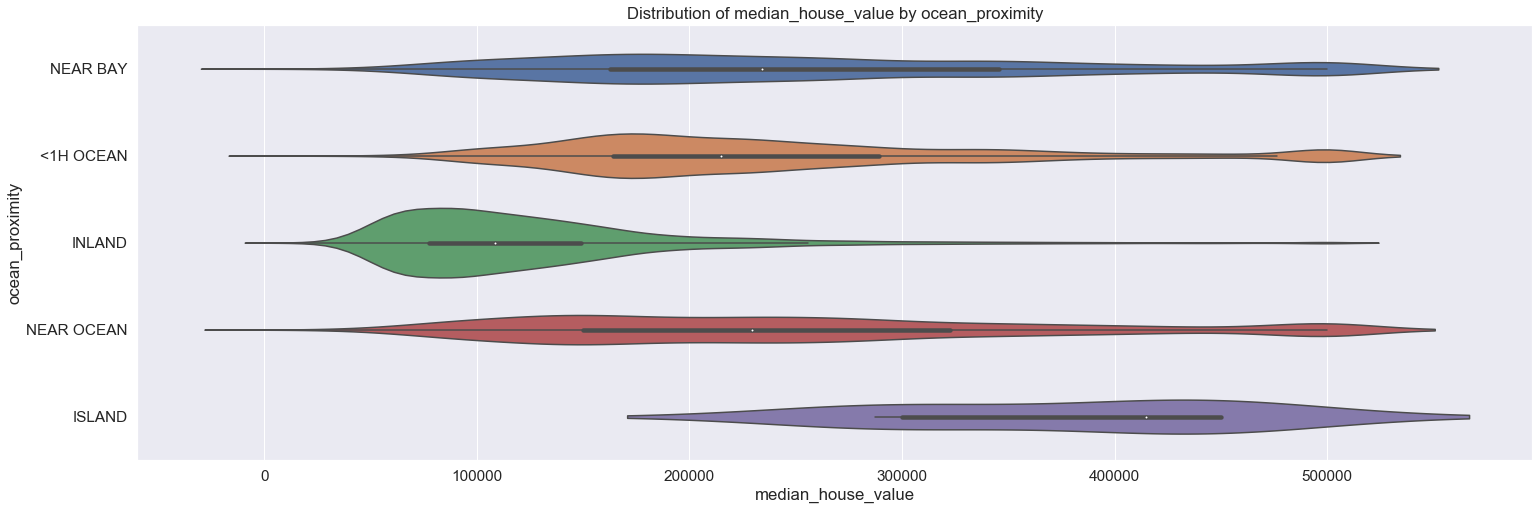

In [54]:
plt.figure(figsize=(25, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Анализ признаков

**Количественные признаки**

In [55]:
df_num_features = df.select_dtypes(include='float64')

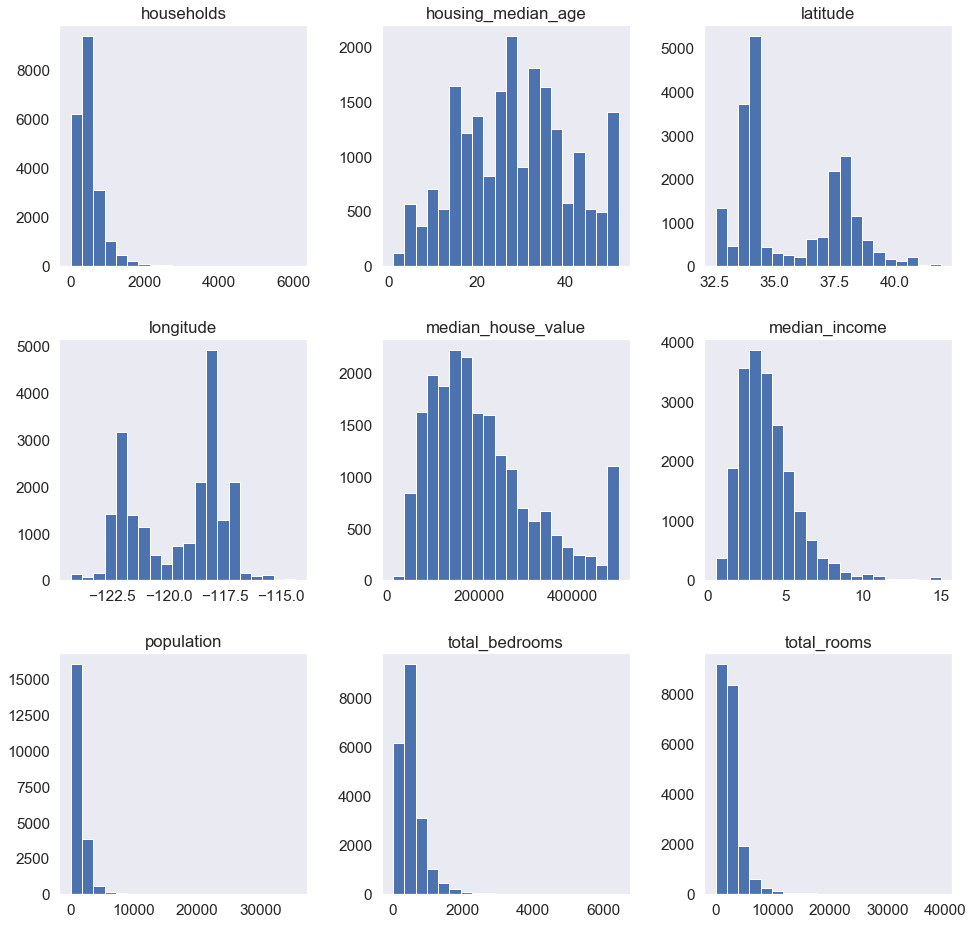

In [56]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

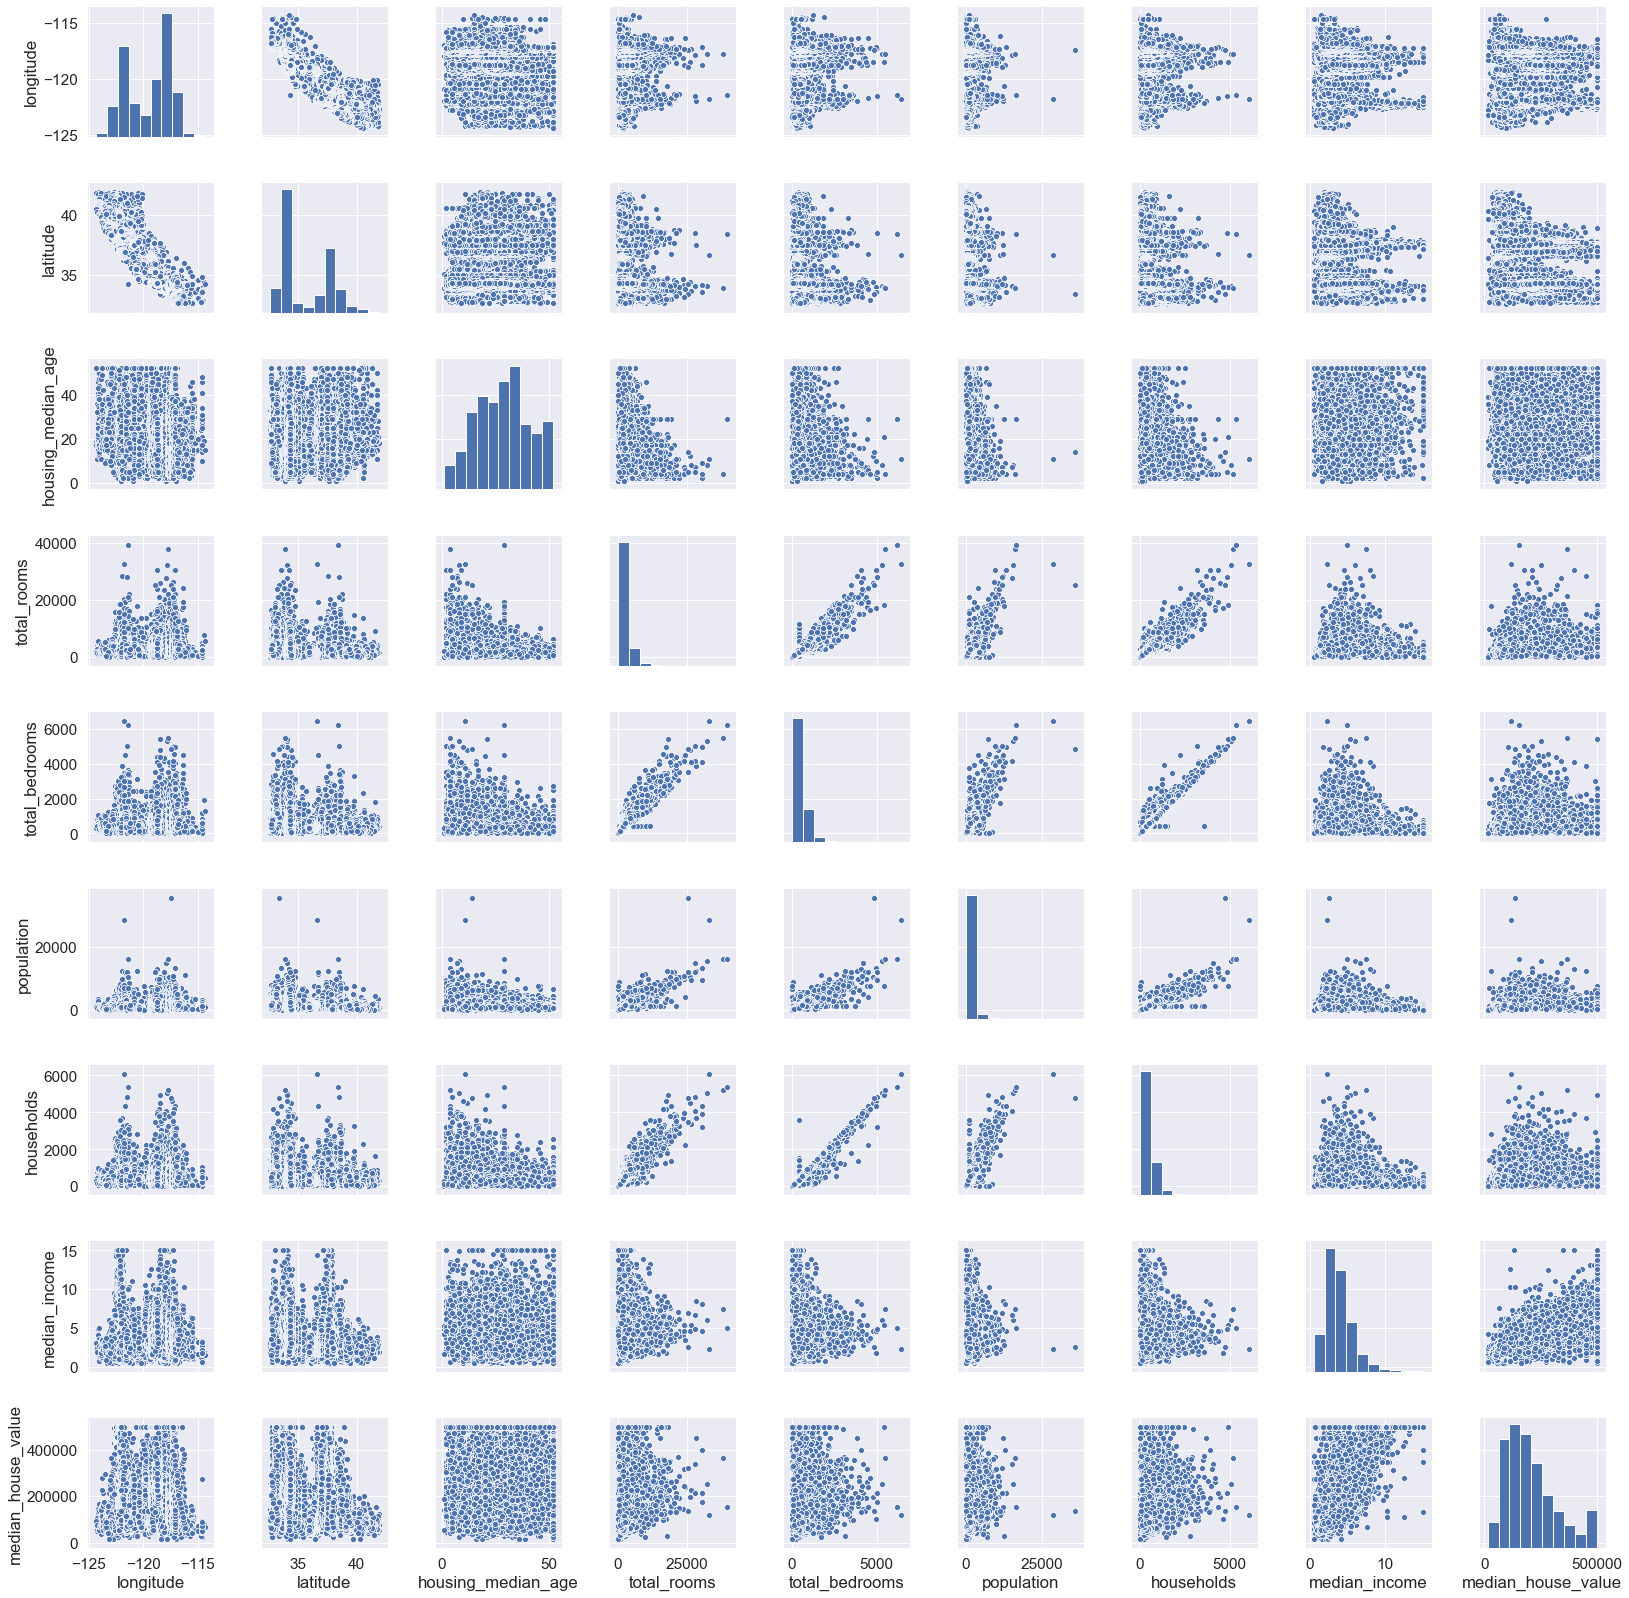

In [57]:
sns.pairplot(df_num_features);

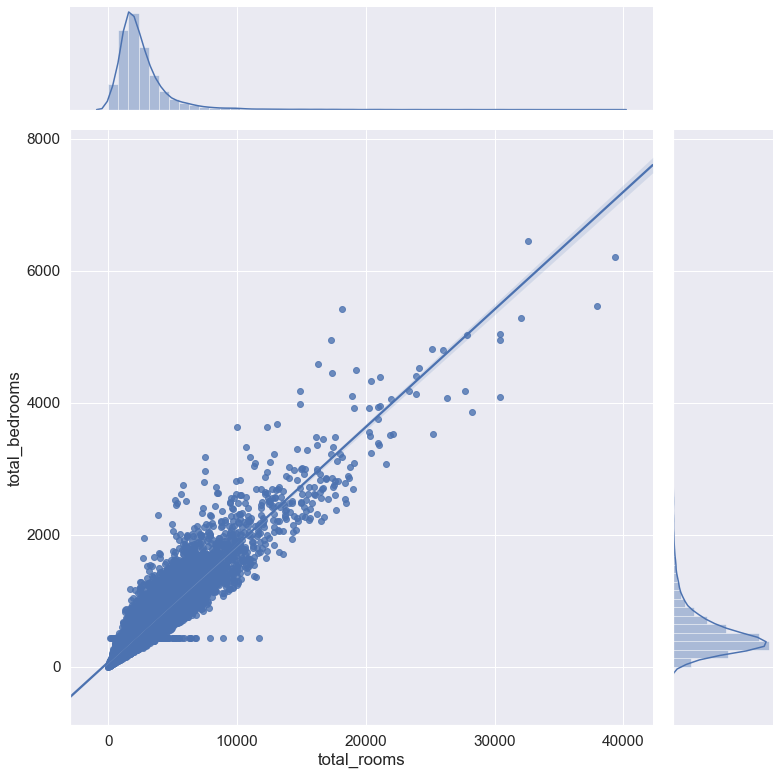

In [58]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

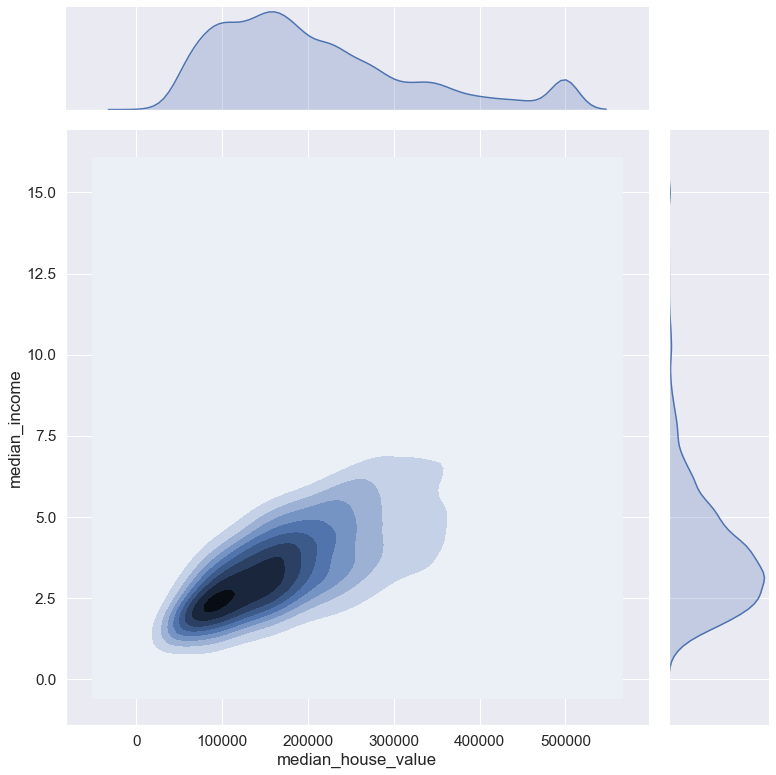

In [59]:
grid = sns.jointplot(df['median_house_value'], df['median_income'], kind='kde')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Бинарные признаки**

In [60]:
df_bin_features = df.select_dtypes(include='int64')

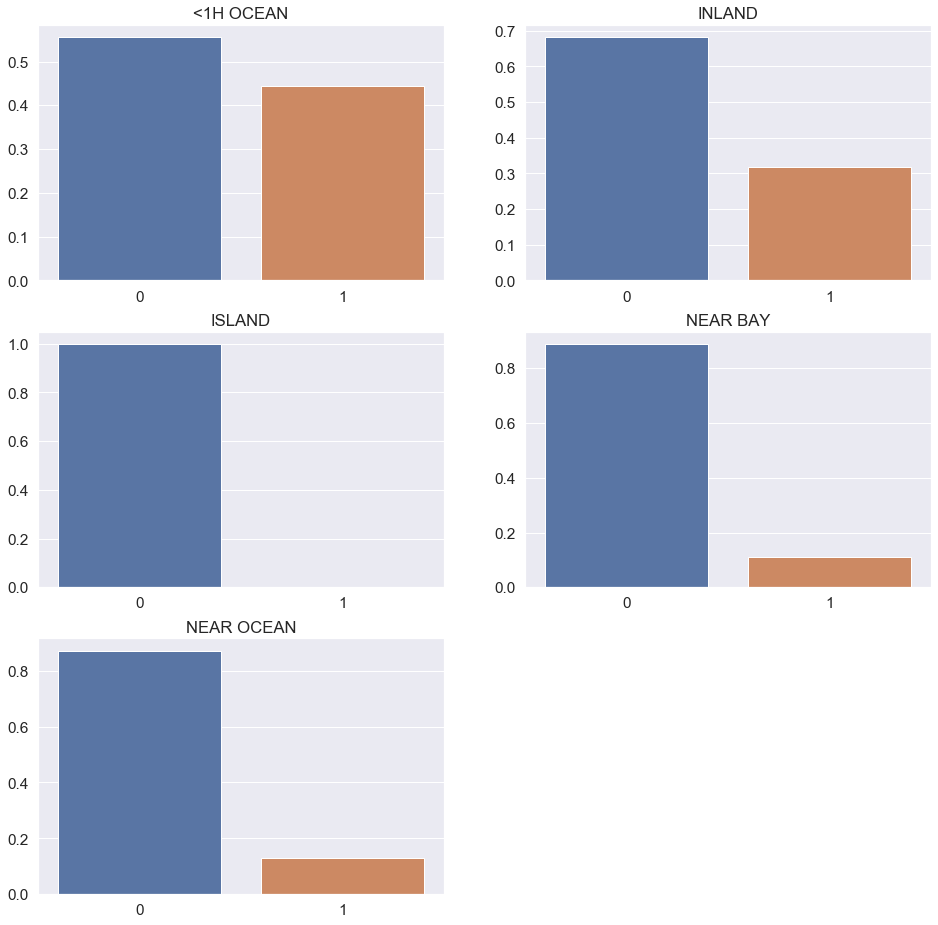

In [62]:
# sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    # normalize=True - для доли
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### Матрица корреляций

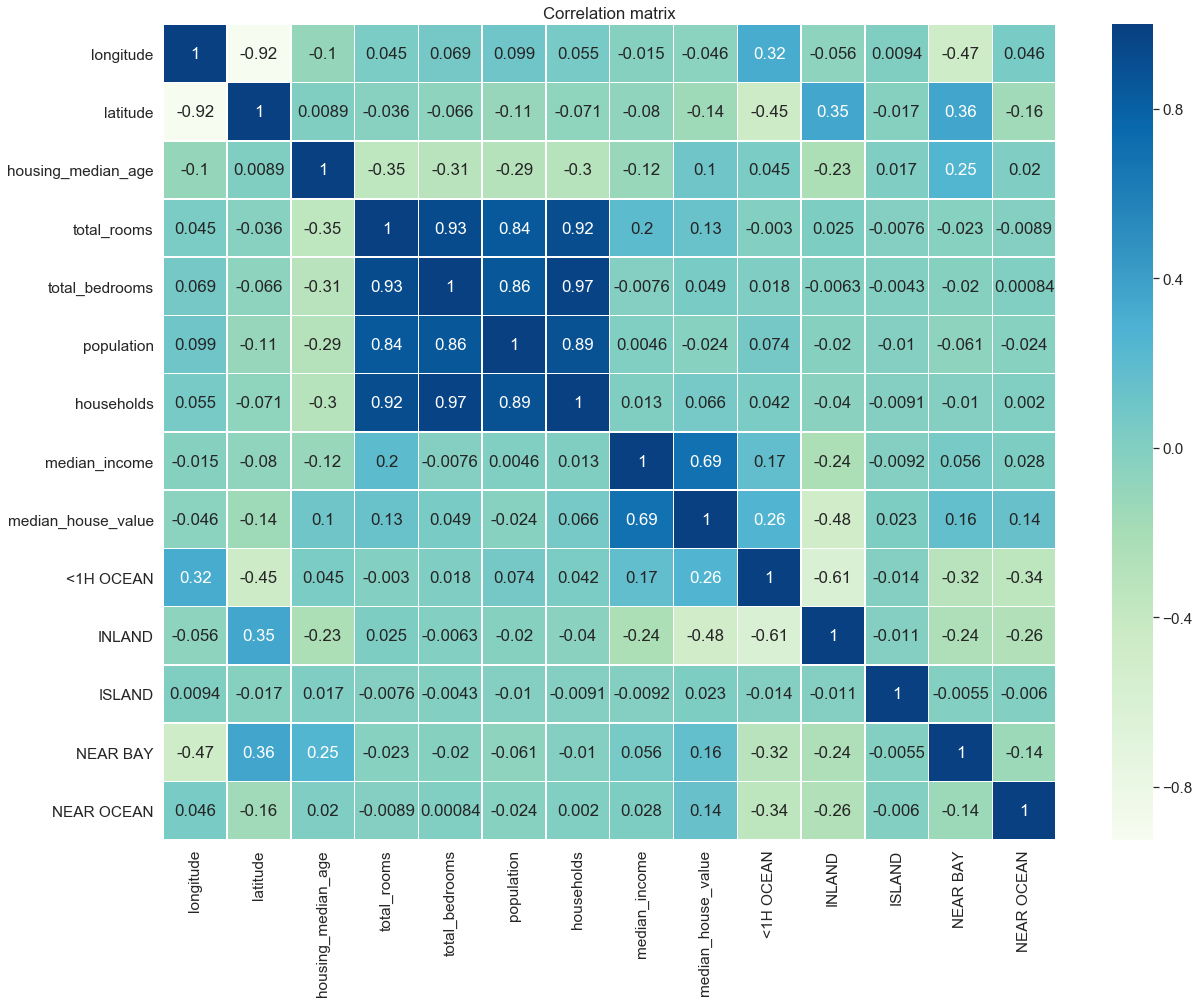

In [63]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Визуализация данных на карте

In [64]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

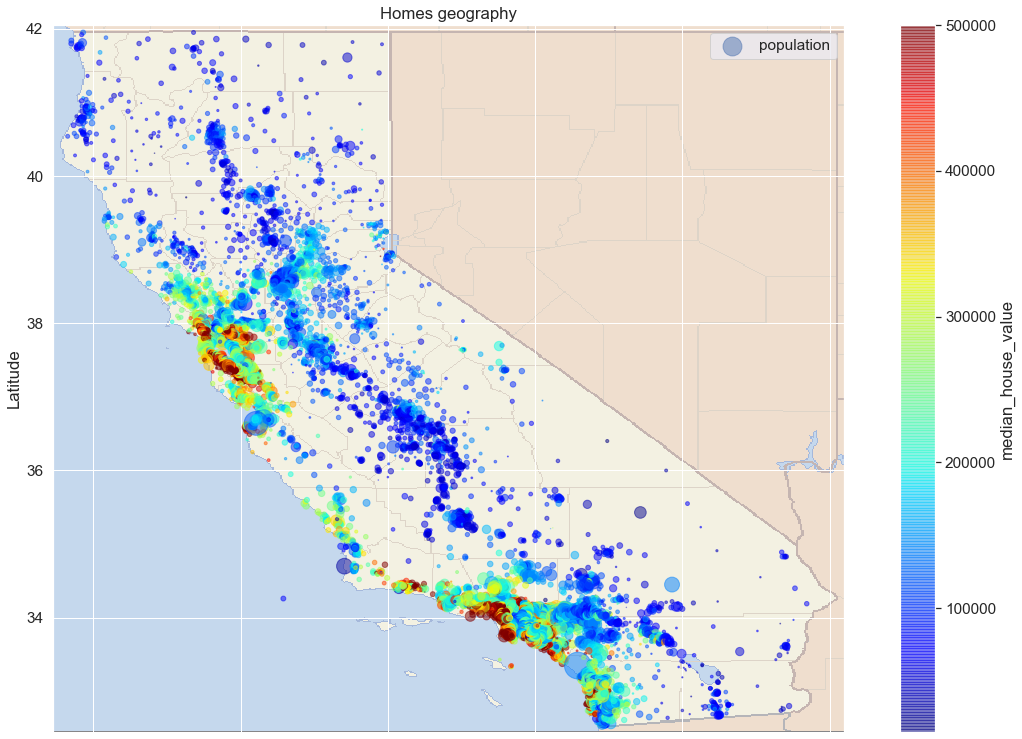

In [65]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()